In [3]:
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import spacy
from spacy.matcher import Matcher

#read from pdf
import PyPDF2
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

import subprocess  # noqa: S404
import sys


import nltk  
import string

import bs4 as bs  
import urllib.request  
import re  
import docx2txt



from nltk.tokenize import WordPunctTokenizer
nltk.download('stopwords')
from nltk.corpus import stopwords
# needed for nltk.pos_tag function nltk.download(’averaged_perceptron_tagger’)
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import textract


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hocine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hocine/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# python version
import sys
print(sys.version)

3.9.5 (default, May 18 2021, 12:31:01) 
[Clang 10.0.0 ]


In [5]:
# 1st version

# creating a pdf file object 
pdfFileObj = open('///Users/hocine/Documents/Imene/github_code/cv_pars/Resume-4.pdf', 'rb') 

#pdfFileObj = open('///Users/imene/Desktop/resume_006.pdf', 'rb') 


# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
    
# printing number of pages in pdf file 
print(pdfReader.numPages) 
    
# creating a page object 
pageObj = pdfReader.getPage(0) 
    
# extracting text from page 
pdfTotext = pageObj.extractText()
    
# closing the pdf file object 
pdfFileObj.close() 
    



3


In [6]:
pdfTotext.split("\n")

['Florian',
 ' Wilhelm',
 'Principal Data Scientist',
 'Cologne, Germany',
 'k',
 'Florian.Wilhelm@gmail.com',
 'Personal Information',
 'Date of Birth',
 '23/11/1981',
 'Place of Birth',
 'Neustadt an der Weinstraÿe, Germany',
 'Marital status',
 'single',
 'Nationality',
 'Germany',
 'Work Experience',
 '04/2016 \x15 today',
 'Principal Data Scientist',
 ',',
 'inovex GmbH',
 ', Cologne, Germany.',
 'Consultant for Data Science, mathematical modelling and Big Data maximizing the bene˝ts',
 'of the digital transformation for our customers. Tasks:',
 '\x0f',
 'building a recommendation engine and user preference service for a large e-commerce com-',
 'pany (mobile.de),',
 '\x0f',
 'fraud and account takeover detection for a large e-commerce company,',
 '\x0f',
 'learning to rank to improve search results of customers for a large e-commerce company,',
 '\x0f',
 'research projects in OCR with deep learning, NLP interface for SQL, reinforcement learning',
 'and uncertainty quanti˝cation,'

In [7]:
# Check the text on a dataframe
pd.DataFrame(pdfTotext.split("\n"))

,0
0,Florian
1,Wilhelm
2,Principal Data Scientist
3,"Cologne, Germany"
4,k
...,...
71,"tutor in the Data Science Academy,"
72,
73,contributions to open-source projects like Sci...
74,1/3


In [8]:
PHONE_REG = re.compile(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]')


def doc_to_text_catdoc(file_path):
    try:
        process = subprocess.Popen(  # noqa: S607,S603
            ['catdoc', '-w', file_path],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            universal_newlines=True,
        )
    except (
        FileNotFoundError,
        ValueError,
        subprocess.TimeoutExpired,
        subprocess.SubprocessError,
    ) as err:
        return (None, str(err))
    else:
        stdout, stderr = process.communicate()

    return (stdout.strip(), stderr.strip())


def extract_phone_number(resume_text):
    phone = re.findall(PHONE_REG, resume_text)

    if phone:
        number = ''.join(phone[0])

        if resume_text.find(number) >= 0 and len(number) < 16:
            return number
    return None



In [ ]:
df=pd.DataFrame()

In [ ]:
process = subprocess.Popen(  # noqa: S607,S603
            ['textutil', '-convert', 'txt', '-stdout', "/Users/imene/Desktop/testcv/ME.docx"],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            universal_newlines=True,
)

In [ ]:
doc2textOut = process.communicate()

In [ ]:
process.terminate()

In [ ]:
doc2textOut[0].split("\n")

In [ ]:
#2nd version

In [ ]:
import docx2txt


In [ ]:
print(extract_text_from_docx('///Users/imene/Desktop/testcv/ME.docx'))  

In [9]:

# doc to text function

def doc_to_text_catdoc(file_path):
    try:
        process = subprocess.Popen(  # noqa: S607,S603
            ['textutil', '-convert', 'txt', '-stdout', file_path],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            universal_newlines=True,
        )
    except (
        FileNotFoundError,
        ValueError,
        subprocess.TimeoutExpired,
        subprocess.SubprocessError,
    ) as err:
        return (None, str(err))
    else:
        stdout, stderr = process.communicate()

    return (stdout.strip(), stderr.strip())




In [11]:
text, err = doc_to_text_catdoc('///Users/hocine/Documents/Imene/github_code/cv_pars/ME.docx')

if err:
    print(err)  # noqa: T001
    exit

print(text)  # noqa: T001

+1 (970) 333-3833  
matthew.eliot@mail.com 
https://linkedin.com/mattheweliot
+1 (970) 333-3833  
matthew.eliot@mail.com 
https://linkedin.com/mattheweliot
Hocine Bouarab
Hocine Bouarab
Summary
Senior Web Developer specializing in front end development. Experienced with all stages of the development cycle for dynamic web projects. Well-versed in numerous programming languages including HTML5, PHP OOP, JavaScript, CSS, MySQL. Strong background in project management and customer relations.
Skill Highlights
	•	Project management
	•	Strong decision maker
	•	Complex problem solver
	•	Creative design
	•	Innovative
	•	Service-focused
Experience
Web Developer - 09/2015 to 05/2019
Luna Web Design, New York
	•	Cooperate with designers to create clean interfaces and simple, intuitive interactions and experiences.
	•	Develop project concepts and maintain optimal workflow.
	•	Work with senior developer to manage large, complex design projects for corporate clients.
	•	Complete detailed programming 

In [12]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to /Users/hocine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hocine/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/hocine/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/hocine/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [13]:
#Putting a docx in .txt
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None





In [14]:
def extract_names(txt):
    person_names = []

    for sent in nltk.sent_tokenize(txt):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label') and chunk.label() == 'PERSON':
                person_names.append(
                    ' '.join(chunk_leave[0] for chunk_leave in chunk.leaves())
                )

    return person_names

In [16]:
text = extract_text_from_docx('///Users/hocine/Documents/Imene/github_code/cv_pars/ME.docx')


In [19]:
#Function to extract names
names = extract_names(text)

if names:
    print(names[0]) 

Hocine Bouarab Hocine Bouarab Summary Senior Web Developer


In [18]:
text

'+1 (970) 333-3833  \n\nmatthew.eliot@mail.com \n\nhttps://linkedin.com/mattheweliot\n\n+1 (970) 333-3833  \n\nmatthew.eliot@mail.com \n\nhttps://linkedin.com/mattheweliot\n\nHocine Bouarab\n\nHocine Bouarab\n\nSummary\n\nSenior Web Developer specializing in front end development. Experienced with all stages of the development cycle for dynamic web projects. Well-versed in numerous programming languages including HTML5, PHP OOP, JavaScript, CSS, MySQL. Strong background in project management and customer relations.\n\nSkill Highlights\n\nProject management\n\nStrong decision maker\n\nComplex problem solver\n\nCreative design\n\nInnovative\n\nService-focused\n\nExperience\n\nWeb Developer - 09/2015 to 05/2019\n\nLuna Web Design, New York\n\nCooperate with designers to create clean interfaces and simple, intuitive interactions and experiences.\n\nDevelop project concepts and maintain optimal workflow.\n\nWork with senior developer to manage large, complex design projects for corporate cl

In [ ]:
# 3rd version

In [20]:
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as fh:
        # iterate over all pages of PDF document
        for page in PDFPage.get_pages(fh, caching=True, check_extractable=True):
            # creating a resoure manager
            resource_manager = PDFResourceManager()
            
            # create a file handle
            fake_file_handle = io.StringIO()
            
            # creating a text converter object
            converter = TextConverter(
                                resource_manager, 
                                fake_file_handle, 
                                codec='utf-8', 
                                laparams=LAParams()
                        )

            # creating a page interpreter
            page_interpreter = PDFPageInterpreter(
                                resource_manager, 
                                converter
                            )

            # process current page
            page_interpreter.process_page(page)
            
            # extract text
            text = fake_file_handle.getvalue()
            yield text

            # close open handles
            converter.close()
            fake_file_handle.close()



In [22]:
pdf_path='///Users/hocine/Documents/Imene/github_code/cv_pars/Resume-4.pdf'
textout=extract_text_from_pdf(pdf_path)

In [24]:
text = extract_text_from_docx('///Users/hocine/Documents/Imene/github_code/cv_pars/resume_006.docx')



In [ ]:
text

In [25]:
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

In [26]:
import spacy
from spacy.matcher import Matcher

# load pre-trained model
nlp = spacy.load('en_core_web_sm')

# initialize matcher with a vocab
matcher = Matcher(nlp.vocab)



In [27]:
def extract_name(resume_text):
    nlp_text = nlp(resume_text)
    
    # First name and Last name are always Proper Nouns
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]

    matcher.add(key="NAME", on_match=None, patterns=[pattern])
    
    matches = matcher(nlp_text)
    
    for match_id, start, end in matches:
        span = nlp_text[start:end]
        return span.text



In [28]:
#extract_name('///Users/imene/Desktop/Resume-4.pdf')
pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
matcher.add(key="NAME", on_match=None, patterns=[pattern])

In [29]:
matches = matcher(nlp(text))

In [30]:
matches

[(424143666773229379, 33, 35),
 (424143666773229379, 73, 75),
 (424143666773229379, 134, 136),
 (424143666773229379, 151, 153),
 (424143666773229379, 152, 154),
 (424143666773229379, 230, 232),
 (424143666773229379, 270, 272),
 (424143666773229379, 331, 333),
 (424143666773229379, 348, 350),
 (424143666773229379, 349, 351),
 (424143666773229379, 405, 407),
 (424143666773229379, 472, 474),
 (424143666773229379, 495, 497),
 (424143666773229379, 496, 498),
 (424143666773229379, 549, 551),
 (424143666773229379, 572, 574),
 (424143666773229379, 576, 578),
 (424143666773229379, 585, 587),
 (424143666773229379, 663, 665),
 (424143666773229379, 730, 732),
 (424143666773229379, 753, 755),
 (424143666773229379, 754, 756),
 (424143666773229379, 807, 809),
 (424143666773229379, 830, 832),
 (424143666773229379, 834, 836),
 (424143666773229379, 843, 845),
 (424143666773229379, 910, 912),
 (424143666773229379, 911, 913),
 (424143666773229379, 928, 930),
 (424143666773229379, 937, 939),
 (424143666773

In [31]:
extract_name(text)

'Programming Languages'

In [33]:
text = extract_text_from_docx('///Users/hocine/Documents/Imene/github_code/cv_pars/resume_006.docx')



In [34]:
import re


def extract_mobile_number(text):
    phone = re.findall(re.compile(r'(?:(?:\+?([1-9]|[0-9][0-9]|[0-9][0-9][0-9])\s*(?:[.-]\s*)?)?(?:\(\s*([2-9]1[02-9]|[2-9][02-8]1|[2-9][02-8][02-9])\s*\)|([0-9][1-9]|[0-9]1[02-9]|[2-9][02-8]1|[2-9][02-8][02-9]))\s*(?:[.-]\s*)?)?([2-9]1[02-9]|[2-9][02-9]1|[2-9][02-9]{2})\s*(?:[.-]\s*)?([0-9]{4})(?:\s*(?:#|x\.?|ext\.?|extension)\s*(\d+))?'), text)
    
    if phone:
        number = ''.join(phone[0])
        if len(number) > 10:
            return '+' + number
        else:
            return number

In [35]:
extract_mobile_number(text)

'3133078'

# Test with Regex

In [36]:
import docx2txt



In [37]:
def extract_text_from_docx(docx_path):
    txt = docx2txt.process(docx_path)
    if txt:
        return txt.replace('\t', ' ')
    return None

In [39]:
doc2tx=extract_text_from_docx('///Users/hocine/Documents/Imene/github_code/cv_pars/JG.docx')

In [40]:
doc2tx

'JOHN GUY\n\n344 ELM STREET MADISON, SD 57042\n\n+1 (970) 333-3833 # John.guy@Mail.com # linkedin.com/JOHNGUY\n\n\n\nSummary \n\nSoftware Engineer with experience in all levels of testing, including performance, functional, integration, system, regression, and user acceptance testing. Supportive and enthusiastic team player dedicated to streamlining processes and efficiently resolving project issues.\n\nSkill Highlights\n\nAgile/Scrum methodology\n\nPerformance and scalability\n\nOptimization\n\nAPI design\n\nExperience\n\n Software Engineer - 09/2015 to 05/2019\n\n Luna Software, New York\n\n Investigation, design, and implement scalable applications for data identification, analysis, retrieval, and indexing.\n\n Software design and development while remaining concentrate on client needs.\n\n Cooperate diligently with other IT team members to plan, design, and develop smart solutions.\n\n Estimate interface between hardware and software.\n\n Interface with business analysts, developer

In [41]:
doc2txspli=doc2tx.split("\n")

In [42]:
doc2txspli

['JOHN GUY',
 '',
 '344 ELM STREET MADISON, SD 57042',
 '',
 '+1 (970) 333-3833 # John.guy@Mail.com # linkedin.com/JOHNGUY',
 '',
 '',
 '',
 'Summary ',
 '',
 'Software Engineer with experience in all levels of testing, including performance, functional, integration, system, regression, and user acceptance testing. Supportive and enthusiastic team player dedicated to streamlining processes and efficiently resolving project issues.',
 '',
 'Skill Highlights',
 '',
 'Agile/Scrum methodology',
 '',
 'Performance and scalability',
 '',
 'Optimization',
 '',
 'API design',
 '',
 'Experience',
 '',
 ' Software Engineer - 09/2015 to 05/2019',
 '',
 ' Luna Software, New York',
 '',
 ' Investigation, design, and implement scalable applications for data identification, analysis, retrieval, and indexing.',
 '',
 ' Software design and development while remaining concentrate on client needs.',
 '',
 ' Cooperate diligently with other IT team members to plan, design, and develop smart solutions.',
 '

In [45]:
import textract
cvdoc = textract.process("///Users/hocine/Documents/Imene/github_code/cv_pars/JG.docx")


In [46]:
#to convert html (a byte-like object) into a string 
cvdocx = cvdoc.decode('utf-8')

In [47]:
cvdocx

'JOHN GUY\n\n344 ELM STREET MADISON, SD 57042\n\n+1 (970) 333-3833 # John.guy@Mail.com # linkedin.com/JOHNGUY\n\n\n\nSummary\t\n\nSoftware Engineer with experience in all levels of testing, including performance, functional, integration, system, regression, and user acceptance testing. Supportive and enthusiastic team player dedicated to streamlining processes and efficiently resolving project issues.\n\nSkill Highlights\n\nAgile/Scrum methodology\n\nPerformance and scalability\n\nOptimization\n\nAPI design\n\nExperience\n\n\tSoftware Engineer - 09/2015 to 05/2019\n\n\tLuna Software, New York\n\n\tInvestigation, design, and implement scalable applications for data identification, analysis, retrieval, and indexing.\n\n\tSoftware design and development while remaining concentrate on client needs.\n\n\tCooperate diligently with other IT team members to plan, design, and develop smart solutions.\n\n\tEstimate interface between hardware and software.\n\n\tInterface with business analysts, d

In [48]:
cvdocxv=cvdocx.split("\n")

In [49]:
print(type(cvdocxv))

<class 'list'>


In [50]:
cvdocxv

['JOHN GUY',
 '',
 '344 ELM STREET MADISON, SD 57042',
 '',
 '+1 (970) 333-3833 # John.guy@Mail.com # linkedin.com/JOHNGUY',
 '',
 '',
 '',
 'Summary\t',
 '',
 'Software Engineer with experience in all levels of testing, including performance, functional, integration, system, regression, and user acceptance testing. Supportive and enthusiastic team player dedicated to streamlining processes and efficiently resolving project issues.',
 '',
 'Skill Highlights',
 '',
 'Agile/Scrum methodology',
 '',
 'Performance and scalability',
 '',
 'Optimization',
 '',
 'API design',
 '',
 'Experience',
 '',
 '\tSoftware Engineer - 09/2015 to 05/2019',
 '',
 '\tLuna Software, New York',
 '',
 '\tInvestigation, design, and implement scalable applications for data identification, analysis, retrieval, and indexing.',
 '',
 '\tSoftware design and development while remaining concentrate on client needs.',
 '',
 '\tCooperate diligently with other IT team members to plan, design, and develop smart solutions

# email

In [52]:
#in my cv case I need first to split the text into several sentences
text1=text.split('\n')
text1

['Skills',
 '',
 'I developed a toolbox in Python that help me in:',
 '',
 'Parsing résumés. ',
 '',
 'Recognizing similar domains and experiences.',
 '',
 'Advanced candidate sourcing. ',
 '',
 'Strong knowledge in Programming Languages:  ',
 '',
 'Python, C++, MATLAB, SAS, SQL …',
 '',
 'Strong knowledge in Financial market.',
 '',
 ' Mathematic modeling skills: Linear programming, ',
 '',
 'Stochastic process, Machin learning…',
 '',
 'Strong knowledge in MS Office and similar platforms.',
 '',
 'Highly developed organization, project management',
 '',
 ' and presentation skills.',
 '',
 'Effective communication skills in three languages: ',
 '',
 'English, French, Arabic.',
 '',
 'Interest',
 '',
 'Data science models to maximize ',
 '',
 'sourcing process through several strategies.',
 '',
 'Automation phases of sourcing process.',
 '',
 'Education & Certificate',
 '',
 'Universite du Quebec a Montreal, Montreal, Canada, Master degree in mathematics option statistics.',
 '',
 'Uni

In [53]:
pattern = re.compile(r'[\w\.-]+@[\w\.-]+')

for line in text1:    #cvdocxv
    g=pattern.findall(line)
    if len(g) == 0:# == []:
        continue
    print(g)
    break
    
    
    
    #if g != []:
     #len(g) == 0   
    #if len(g) == 0:
        #print('empty String')
    #else:
    #print(g)               #print(pattern.findall(line))

['imeneallab@gmail.com']


# Phone number

In [54]:
import re


def extract_mobile_number(text):
    phone = re.findall(re.compile(r'(?:(?:\+?([1-9]|[0-9][0-9]|[0-9][0-9][0-9])\s*(?:[.-]\s*)?)?(?:\(\s*([2-9]1[02-9]|[2-9][02-8]1|[2-9][02-8][02-9])\s*\)|([0-9][1-9]|[0-9]1[02-9]|[2-9][02-8]1|[2-9][02-8][02-9]))\s*(?:[.-]\s*)?)?([2-9]1[02-9]|[2-9][02-9]1|[2-9][02-9]{2})\s*(?:[.-]\s*)?([0-9]{4})(?:\s*(?:#|x\.?|ext\.?|extension)\s*(\d+))?'), text)
    
    if phone:
        number = ''.join(phone[0])
        if len(number) > 10:
            return '+' + number
        else:
            return number

In [55]:
extract_mobile_number(cvdocx)
#cvdocx is a text and non a list

'+19703333833'

In [56]:
pattern1 = re.compile(r'(?:(?:\+?([1-9]|[0-9][0-9]|[0-9][0-9][0-9])\s*(?:[.-]\s*)?)?(?:\(\s*([2-9]1[02-9]|[2-9][02-8]1|[2-9][02-8][02-9])\s*\)|([0-9][1-9]|[0-9]1[02-9]|[2-9][02-8]1|[2-9][02-8][02-9]))\s*(?:[.-]\s*)?)?([2-9]1[02-9]|[2-9][02-9]1|[2-9][02-9]{2})\s*(?:[.-]\s*)?([0-9]{4})(?:\s*(?:#|x\.?|ext\.?|extension)\s*(\d+))?')


for line in text1:    #cvdocxv
    g=pattern1.findall(line)
    if len(g) == 0:# == []:
        continue
    print(g)
    break
    

[('', '', '', '313', '3078', '')]


In [57]:

## Suppose we have a text with many email addresses
str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'

  ## Here re.findall() returns a list of all the found email strings
emails = re.findall(r'[\w\.-]+@[\w\.-]+', str) ## ['alice@google.com', 'bob@abc.com']
for email in emails:
    # do something with each found email string
    print(email) 
#revoir https://stackoverflow.com/questions/2842345/regular-expression-for-finding-phone-numbers

alice@google.com
bob@abc.com


# Linkedin

In [59]:
pattern = re.compile(r'linkedin[\w\.-]+.*')
#pattern = re.compile(r'[\w\.-]+linkedin[\w\.-]+\.[a-zA-Z0-9/~\-_,&=\?\.;]')


for line in text1:    #cvdocxv
    g=pattern.findall(line)
    if len(g) == 0:# == []:
        continue
    print(g)
    break
#dot mean every thing exept \n that came after .com, 
# but if we add * that means every thing that is still connect to my string except \n
 

['linkedin.com/in/chahira-imene-allab-31330783']


In [ ]:
this work aim to creat a CV parser for several type of document (txt, .docs, pdf), extracting basic informations 
(email, Linkedin...), there is also a text analysis part (cleaning text:lower sentences, tokenization, cleaning text, getting top ranking features)




# Text CV processing

In [61]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer 
from gensim.models import Word2Vec
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from gensim.models import Word2Vec
from nltk.corpus import stopwords



[nltk_data] Downloading package punkt to /Users/hocine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hocine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hocine/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [62]:
#Convert a collection of text documents to a matrix of token counts CountVectorizer()


cv=CountVectorizer() 
word_count_vector=cv.fit_transform(text1)
print(cv.get_feature_names())

['2009', '2010', '2011', '2014', '2015', '2018', '2020', '31330783', '44', '495', '742', '7742', 'ability', 'advanced', 'algeria', 'algiers', 'allab', 'ambitious', 'analyst', 'analyzing', 'and', 'applications', 'applied', 'apr', 'arabic', 'are', 'areas', 'automation', 'awbridge', 'bank', 'bases', 'bond', 'brand', 'building', 'calculus', 'canada', 'candidate', 'certificate', 'chahira', 'chain', 'co', 'com', 'communication', 'completion', 'computerized', 'conducting', 'conferences', 'construction', 'consulting', 'creating', 'data', 'datawarehouse', 'de', 'degree', 'develop', 'developed', 'different', 'domains', 'du', 'dubai', 'during', 'easily', 'economics', 'education', 'effective', 'elaborate', 'employment', 'engineering', 'english', 'evaluate', 'events', 'experience', 'experiences', 'extracting', 'fast', 'finance', 'financial', 'for', 'forecasting', 'foundations', 'france', 'french', 'from', 'gain', 'gmail', 'great', 'have', 'help', 'highly', 'imene', 'imeneallab', 'in', 'industry', '

/Users/hocine/miniconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [64]:
import textract
cvdoc = textract.process("///Users/hocine/Documents/Imene/github_code/cv_pars/JG.docx")

cvdocx = cvdoc.decode('utf-8')
cvdocx

'JOHN GUY\n\n344 ELM STREET MADISON, SD 57042\n\n+1 (970) 333-3833 # John.guy@Mail.com # linkedin.com/JOHNGUY\n\n\n\nSummary\t\n\nSoftware Engineer with experience in all levels of testing, including performance, functional, integration, system, regression, and user acceptance testing. Supportive and enthusiastic team player dedicated to streamlining processes and efficiently resolving project issues.\n\nSkill Highlights\n\nAgile/Scrum methodology\n\nPerformance and scalability\n\nOptimization\n\nAPI design\n\nExperience\n\n\tSoftware Engineer - 09/2015 to 05/2019\n\n\tLuna Software, New York\n\n\tInvestigation, design, and implement scalable applications for data identification, analysis, retrieval, and indexing.\n\n\tSoftware design and development while remaining concentrate on client needs.\n\n\tCooperate diligently with other IT team members to plan, design, and develop smart solutions.\n\n\tEstimate interface between hardware and software.\n\n\tInterface with business analysts, d

In [65]:
# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',cvdocx)
text = re.sub(r'\s+',' ',cvdocx)
text = text.lower()
text = re.sub(r'\d',' ',cvdocx)
text = re.sub(r'\s+',' ',cvdocx)

In [66]:
text=cvdocx.split('\n')

text

['JOHN GUY',
 '',
 '344 ELM STREET MADISON, SD 57042',
 '',
 '+1 (970) 333-3833 # John.guy@Mail.com # linkedin.com/JOHNGUY',
 '',
 '',
 '',
 'Summary\t',
 '',
 'Software Engineer with experience in all levels of testing, including performance, functional, integration, system, regression, and user acceptance testing. Supportive and enthusiastic team player dedicated to streamlining processes and efficiently resolving project issues.',
 '',
 'Skill Highlights',
 '',
 'Agile/Scrum methodology',
 '',
 'Performance and scalability',
 '',
 'Optimization',
 '',
 'API design',
 '',
 'Experience',
 '',
 '\tSoftware Engineer - 09/2015 to 05/2019',
 '',
 '\tLuna Software, New York',
 '',
 '\tInvestigation, design, and implement scalable applications for data identification, analysis, retrieval, and indexing.',
 '',
 '\tSoftware design and development while remaining concentrate on client needs.',
 '',
 '\tCooperate diligently with other IT team members to plan, design, and develop smart solutions

In [67]:
text = [x for x in text if (x != '') & (x!='\t')]
text = [x.replace('\t','') for x in text]

In [68]:
text

['JOHN GUY',
 '344 ELM STREET MADISON, SD 57042',
 '+1 (970) 333-3833 # John.guy@Mail.com # linkedin.com/JOHNGUY',
 'Summary',
 'Software Engineer with experience in all levels of testing, including performance, functional, integration, system, regression, and user acceptance testing. Supportive and enthusiastic team player dedicated to streamlining processes and efficiently resolving project issues.',
 'Skill Highlights',
 'Agile/Scrum methodology',
 'Performance and scalability',
 'Optimization',
 'API design',
 'Experience',
 'Software Engineer - 09/2015 to 05/2019',
 'Luna Software, New York',
 'Investigation, design, and implement scalable applications for data identification, analysis, retrieval, and indexing.',
 'Software design and development while remaining concentrate on client needs.',
 'Cooperate diligently with other IT team members to plan, design, and develop smart solutions.',
 'Estimate interface between hardware and software.',
 'Interface with business analysts, dev

# Creating a graph of fields

In [69]:
import networkx as nx
import matplotlib.pyplot as plt
#creating graph
G = nx.Graph()

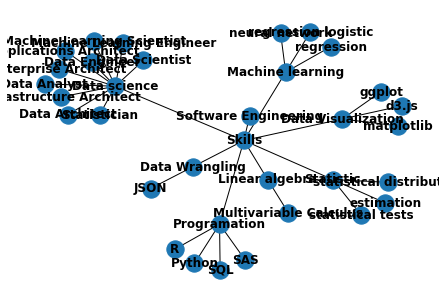

In [70]:
G.add_node("Data science")  
G.add_node("Skills")    
G.add_edge("Data science","Skills")



#skills needed
G.add_node("Programation")  
G.add_edge("Programation","Skills")
G.add_node("Statistic") 
G.add_edge("Statistic","Skills")
G.add_node("Machine learning")    
G.add_edge("Machine learning","Skills")
G.add_node("Linear algebra")    
G.add_edge("Linear algebra","Skills")
G.add_node("Data Wrangling")    
G.add_edge("Data Wrangling","Skills")
G.add_node("Data Visualization")   
G.add_edge("Data Visualization","Skills")
G.add_node("Software Engineering") 
G.add_edge("Software Engineering","Skills")



#skills tools
#Prgram
G.add_node("R")  
G.add_edge("R","Programation")
G.add_node("Python")    
G.add_edge("Python","Programation")
G.add_node("SQL")    
G.add_edge("SQL","Programation")
G.add_node("SAS")    
G.add_edge("SAS","Programation")


#Statistic
G.add_node("statistical tests") #stat test 
G.add_edge("statistical tests","Statistic")
G.add_node("statistical distribution")  #stat ditribution
G.add_edge("statistical distribution","Statistic")
G.add_node("estimation")  #stat estimators
G.add_edge("estimation","Statistic")


#Machine learning
G.add_node("regression")  
G.add_edge("regression","Machine learning")
G.add_node("regression logistic")  
G.add_edge("regression logistic","Machine learning")
G.add_node("neural network")  
G.add_edge("neural network","Machine learning")

#Linear algebra
G.add_node("Multivariable Calculus")  
G.add_edge("Multivariable Calculus","Linear algebra")


#Data Wrangling
G.add_node("JSON")  
G.add_edge("JSON","Data Wrangling")


#Data Visualization
G.add_node("matplotlib")  
G.add_edge("matplotlib","Data Visualization")

G.add_node("ggplot")  
G.add_edge("ggplot","Data Visualization")

G.add_node("d3.js")  
G.add_edge("d3.js","Data Visualization")


##related fields
G.add_node("Data Scientist")  
G.add_edge("Data Scientist","Data science")
G.add_node("Machine Learning Engineer")  
G.add_edge("Machine Learning Engineer","Data science")
G.add_node("Machine Learning Scientist")  
G.add_edge("Machine Learning Scientist","Data science")
G.add_node("Applications Architect")  
G.add_edge("Applications Architect","Data science")
G.add_node("Enterprise Architect")  
G.add_edge("Enterprise Architect","Data science")
G.add_node("Data Architect")  
G.add_edge("Data Architect","Data science")
G.add_node("Infrastructure Architect")  
G.add_edge("Infrastructure Architect","Data science")
G.add_node("Data Engineer")  
G.add_edge("Data Engineer","Data science")
G.add_node("Statistician")  
G.add_edge("Statistician","Data science")
G.add_node("Data Analyst")  
G.add_edge("Data Analyst","Data science")


G["Data science"]["Data Scientist"]["related fields"] = "related fields"
G["Data science"]["Machine Learning Engineer"]["related fields"] = "related fields"
G["Data science"]["Machine Learning Scientist"]["related fields"] = "related fields"
G["Data science"]["Applications Architect"]["related fields"] = "related fields"

G["Data science"]["Enterprise Architect"]["related fields"] = "related fields"

G["Data science"]["Data Architect"]["related fields"] = "related fields"

G["Data science"]["Infrastructure Architect"]["related fields"] = "related fields"


G["Data science"]["Data Engineer"]["related fields"] = "related fields"

G["Data science"]["Statistician"]["related fields"] = "related fields"

G["Data science"]["Data Analyst"]["related fields"] = "related fields"












nx.draw(G, with_labels=True, font_weight='bold') 




In [71]:
from node2vec import Node2Vec

# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
#node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Embed nodes
#model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)
model = node2vec.fit(window=10, min_count=1, batch_words=4)



Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

In [72]:
model.wv.get_vector('Machine Learning Scientist')


array([ 0.25344276,  0.02235227,  0.11178123, -0.03326663, -0.11447776,
       -0.20563707,  0.03298603,  0.28334618, -0.07401322, -0.12500466,
       -0.01115925, -0.2553039 ,  0.10108873,  0.09317604, -0.04960312,
        0.13694596, -0.2578504 , -0.16959862, -0.27555567, -0.30340746,
        0.2531789 ,  0.20456983,  0.1831026 , -0.13674468,  0.11208284,
        0.0493692 ,  0.02743143,  0.02021276,  0.18048358,  0.14079966,
       -0.33023557,  0.19284073, -0.05579909, -0.43077207, -0.02179481,
        0.24047215,  0.2410362 ,  0.25070432, -0.09285128, -0.11673182,
       -0.15633337, -0.07687753, -0.22128066, -0.08664092,  0.05000079,
        0.11753583, -0.30766076, -0.29384214,  0.16922358,  0.34840706,
       -0.143613  ,  0.23167393, -0.07155211,  0.04649964,  0.17845929,
        0.09099946,  0.30000255, -0.10137314, -0.24889675, -0.01378819,
       -0.17544839, -0.10713544, -0.12010296, -0.11269452], dtype=float32)

In [73]:
# Learn embeddings 
model = node2vec.fit(window=10, min_count=1)


In [74]:
#model.most_similar('Machine Learning Scientist')

model.wv.most_similar('Machine Learning Scientist')


[('Statistician', 0.9859862327575684),
 ('Machine Learning Engineer', 0.9843248724937439),
 ('Data Architect', 0.9805712699890137),
 ('Infrastructure Architect', 0.9764870405197144),
 ('Data Analyst', 0.9729412198066711),
 ('Data Engineer', 0.972497820854187),
 ('Applications Architect', 0.9714974164962769),
 ('Enterprise Architect', 0.9697596430778503),
 ('Data Scientist', 0.9649448990821838),
 ('Data science', 0.8934749960899353)]

In [75]:
model.wv.most_similar('Data science')



[('Data Scientist', 0.9227518439292908),
 ('Data Engineer', 0.9210842847824097),
 ('Enterprise Architect', 0.9175671339035034),
 ('Applications Architect', 0.9165979623794556),
 ('Machine Learning Engineer', 0.9127089977264404),
 ('Data Architect', 0.9013705253601074),
 ('Infrastructure Architect', 0.8952251076698303),
 ('Machine Learning Scientist', 0.8934749960899353),
 ('Data Analyst', 0.8894851803779602),
 ('Statistician', 0.8883546590805054)]

In [76]:
import networkx as nx
from node2vec import Node2Vec

# Create a graph
graph = nx.fast_gnp_random_graph(n=100, p=0.5)

# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(graph, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs

# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

# Look for most similar nodes
model.wv.most_similar('2')  # Output node names are always strings


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

[('16', 0.5134089589118958),
 ('72', 0.5089715123176575),
 ('29', 0.5004430413246155),
 ('60', 0.49542516469955444),
 ('44', 0.4897535741329193),
 ('93', 0.4874557852745056),
 ('39', 0.4750909209251404),
 ('68', 0.4744751453399658),
 ('97', 0.47159650921821594),
 ('1', 0.4621552526950836)]